In [1]:
# Importamos los packages necesarios 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargamos los dataset necesarios para el trabajo. 
df_demographics = pd.read_csv('data/data_raw/df_final_demo.txt', sep=',')
df_experiment = pd.read_csv('data/data_raw/df_final_experiment_clients.txt', sep=',')

#Carga de las dos partes 
df_webdata1 = pd.read_csv('data/data_raw/df_final_web_data_pt_1.txt', sep=',')
df_webdata2 = pd.read_csv('data/data_raw/df_final_web_data_pt_2.txt', sep=',')

Unimos y exploramos el dataset con la información referente al proceso web de los clientes. 

In [ ]:
# Creamo las funcion para juntar los dos dataframes sobre el paso de los clientes en el proceso web.

def merge_dataframes(df1, df2, key='client_id'):
    
    merged_df = pd.merge(df1, df2, how='inner', on=key)

    # Eliminar columnas duplicadas que terminan en '_y'
    cols_to_drop = [col for col in merged_df.columns if col.endswith('_y')]
    merged_df.drop(columns=cols_to_drop, inplace=True)

    # Renombrar columnas que terminan en '_x' eliminando el sufijo
    merged_df.rename(columns={
        col: col.replace('_x', '') for col in merged_df.columns if col.endswith('_x')
    }, inplace=True)
    
    # Eliminar duplicados y ordenar por client_id y date_time
    merged_df = merged_df.drop_duplicates().sort_values(['client_id', 'date_time'])

    return merged_df

# Llamamos a la funcion para hacer el merge de los datos 
df_final_webdata = merge_dataframes(df_webdata1, df_webdata2)

# se guarda en la carpeta files para usarlo en el futuro 
df_final_webdata.to_csv('data/df_final_web_data.txt', index=False)

#Cargamos el dataframe final para comprobar que se ha guardado correctamente. 
df_final_webdata = pd.read_csv('data/df_final_web_data.txt',sep=',')
df_final_webdata.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,1643,910842861_51062379179,379946188_1773022140_107963,start,2017-04-15 15:06:00
1,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:36:07
2,1643,910842861_51062379179,633860590_96880450633_976109,step_1,2017-04-24 06:36:32
3,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:37:17
4,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:38:20
5,1677,361240963_15830034505,494607202_74539107264_966618,start,2017-03-31 10:59:27
6,1677,361240963_15830034505,494607202_74539107264_966618,step_1,2017-03-31 10:59:41
7,1677,361240963_15830034505,494607202_74539107264_966618,step_2,2017-03-31 11:00:40
8,1677,361240963_15830034505,494607202_74539107264_966618,start,2017-03-31 11:01:50
9,1680,262688118_24224945474,807102410_81976926205_767113,start,2017-03-15 09:57:21


In [7]:
df_final_webdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28199 entries, 0 to 28198
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     28199 non-null  int64 
 1   visitor_id    28199 non-null  object
 2   visit_id      28199 non-null  object
 3   process_step  28199 non-null  object
 4   date_time     28199 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [8]:
df_final_webdata.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [9]:
print(df_final_webdata['process_step'].value_counts())

process_step
start      12882
step_1      6250
step_2      4228
step_3      2874
confirm     1965
Name: count, dtype: int64


C:\Users\franc\AppData\Local\Temp\ipykernel_12312\410615840.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencias.index, y=frecuencias.values, palette='Blues_d')
C:\Users\franc\AppData\Local\Temp\ipykernel_12312\410615840.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


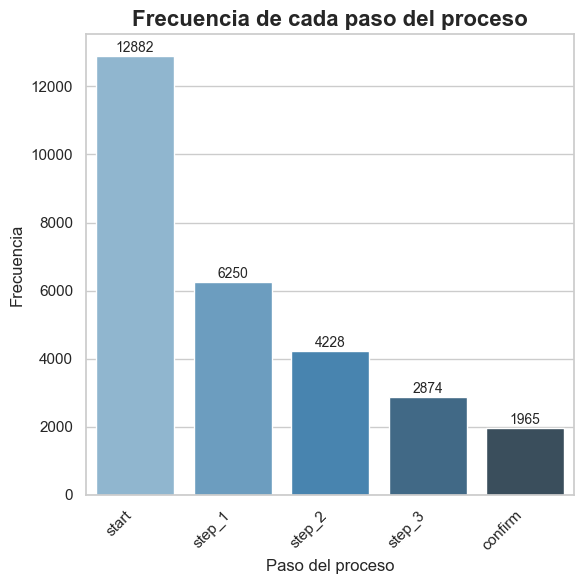

In [30]:
# Estilo general
sns.set(style="whitegrid")

# Contar frecuencia y ordenar
frecuencias = df_final_webdata['process_step'].value_counts()

# Crear figura y ejes
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=frecuencias.index, y=frecuencias.values, palette='Blues_d')

# Títulos y etiquetas
ax.set_title('Frecuencia de cada paso del proceso', fontsize=16, weight='bold')
ax.set_xlabel('Paso del proceso', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

# Rotar etiquetas del eje x para que no se encimen
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar valores sobre cada barra
for i, v in enumerate(frecuencias.values):
    ax.text(i, v + max(frecuencias.values)*0.01, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Teniendo el df del proceso web pasamos a explorar y transformar el df demographics

In [27]:
# Calculamos el porcentaje de valores nulos
null_percentage = df_demographics.isnull().mean().sort_values(ascending=False) * 100

# Formateamos los valores con dos decimales y el símbolo %
null_percentage_formatted = null_percentage.apply(lambda x: f"{x:.2f}%")

print("Porcentaje de valores nulos por columna:")
print(null_percentage_formatted)

Porcentaje de valores nulos por columna:
clnt_age            0.02%
num_accts           0.02%
clnt_tenure_yr      0.02%
clnt_tenure_mnth    0.02%
gendr               0.02%
calls_6_mnth        0.02%
bal                 0.02%
logons_6_mnth       0.02%
client_id           0.00%
dtype: object


In [16]:
def limpiar_demograficos(df):
    # Renombra columnas para mayor claridad
    df = df.rename(columns={
        'clnt_tenure_yr': 'client_tenure_years',
        'clnt_tenure_mnth': 'client_tenure_months',
        'clnt_age': 'age',
        'gendr': 'gender',
        'num_accts': 'number_of_accounts',
        'bal': 'balance',
    })

    # Elimina filas con valores nulos (menos del 0.02% del total)
    df = df.dropna()

    # Normaliza género: reemplaza 'X' por 'U' (Unknown)
    df["gender"] = df["gender"].replace({"X": "U"})

    # Convierte la edad a entero truncado (elimina .5)
    df["age"] = df["age"].astype(int)

    return df


df_demo_clean = limpiar_demograficos(df_demographics)
df_demo_clean.to_csv('data/df_demographic_clean.csv', sep=',',index=False)

In [28]:
df_demo_clean.head(5)

,client_id,client_tenure_years,client_tenure_months,age,gender,number_of_accounts,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0


In [ ]:
# Variables numericas 
numerical_vars = df_demo_clean.select_dtypes(include=[np.number]).columns.tolist()
# Variables categoricas
categorical_vars = df_demo_clean.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numerical variables: {numerical_vars}")
print(f"Categorical variables: {categorical_vars}")

Numerical variables: ['client_id', 'client_tenure_years', 'client_tenure_months', 'age', 'number_of_accounts', 'balance', 'calls_6_mnth', 'logons_6_mnth']
Categorical variables: ['gender']


ahora cargamos el dataset de la prertenencia de cada cliente al grupo test o control 

In [19]:
# Verificamos los primeros registros
print(df_experiment.head())
print(df_experiment['Variation'].value_counts())  # Ver grupos: 'control' vs 'experiment'

   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control
Variation
Test       26968
Control    23532
Name: count, dtype: int64


In [20]:
print(df_experiment.columns.tolist())
df_experiment.columns = df_experiment.columns.str.strip()
df_experiment.rename(columns={'Variation': 'group'}, inplace=True)
print(df_experiment.columns)

['client_id', 'Variation']
Index(['client_id', 'group'], dtype='object')


In [22]:
print(df_experiment['group'].value_counts())

group
Test       26968
Control    23532
Name: count, dtype: int64
